In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [26]:
data=pd.read_table("./Data_Extract_From_World_Development_Indicators_2/f55a1b6c-6a50-4ee3-bfc3-c775ea8759cc_Data.txt")

In [27]:
data

,Time,Time Code,Country Name,Country Code,Access to electricity (% of population) [EG.ELC.ACCS.ZS],Agricultural land (% of land area) [AG.LND.AGRI.ZS],Bank capital to assets ratio (%) [FB.BNK.CAPA.ZS],"Secondary education, pupils [SE.SEC.ENRL]",GDP per capita (current US$) [NY.GDP.PCAP.CD],Rural population (% of total population) [SP.RUR.TOTL.ZS],...,Children out of school (% of primary school age) [SE.PRM.UNER.ZS],"Pupil-teacher ratio, primary [SE.PRM.ENRL.TC.ZS]","Gross intake ratio in first grade of primary education, total (% of relevant age group) [SE.PRM.GINT.ZS]","School enrollment, primary (gross), gender parity index (GPI) [SE.ENR.PRIM.FM.ZS]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Population, total [SP.POP.TOTL]",Proportion of seats held by women in national parliaments (%) [SG.GEN.PARL.ZS],Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],Number of people spending more than 10% of household consumption or income on out-of-pocket health care expenditure [SH.UHC.OOPC.10.TO]
0,2015,YR2015,Afghanistan,AFG,71.500000,58.067580,9.232694,2698816.0,578.466353,75.197,...,NaN,44.32877,108.4754,0.68839,1.679,34413603.0,27.7,0.281553,1.451315,NaN
1,2015,YR2015,Albania,ALB,100.000000,42.857666,9.526138,315079.0,3952.830781,42.566,...,2.20127,18.61557,111.0067,1.03130,17.080,2880703.0,20.7,10.232012,2.230000,NaN
2,2015,YR2015,Algeria,DZA,99.943069,17.405929,8.826316,NaN,4177.888966,29.152,...,0.68412,23.83613,108.1113,0.95230,11.206,39728025.0,31.6,0.427837,3.763467,NaN
3,2015,YR2015,American Samoa,ASM,NaN,24.500000,NaN,NaN,11843.331183,12.762,...,NaN,NaN,NaN,NaN,NaN,55812.0,NaN,NaN,1.248050,NaN
4,2015,YR2015,Andorra,AND,100.000000,40.021275,NaN,4395.0,36039.653496,11.655,...,NaN,9.93795,NaN,NaN,NaN,78011.0,39.3,NaN,0.842204,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data.isna().sum()

Time                                                                                                                                         3
Time Code                                                                                                                                    5
Country Name                                                                                                                                 5
Country Code                                                                                                                                 5
Access to electricity (% of population) [EG.ELC.ACCS.ZS]                                                                                     8
Agricultural land (% of land area) [AG.LND.AGRI.ZS]                                                                                         15
Bank capital to assets ratio (%) [FB.BNK.CAPA.ZS]                                                                                          145

In [29]:
data=data.drop(columns=["Time","Time Code","Country Name","Number of people spending more than 10% of household consumption or income on out-of-pocket health care expenditure [SH.UHC.OOPC.10.TO]","Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS]","Bank capital to assets ratio (%) [FB.BNK.CAPA.ZS]"])

In [30]:
data=data.dropna(axis='rows')
data.isna().sum()

Country Code                                                                                                0
Access to electricity (% of population) [EG.ELC.ACCS.ZS]                                                    0
Agricultural land (% of land area) [AG.LND.AGRI.ZS]                                                         0
Secondary education, pupils [SE.SEC.ENRL]                                                                   0
GDP per capita (current US$) [NY.GDP.PCAP.CD]                                                               0
Rural population (% of total population) [SP.RUR.TOTL.ZS]                                                   0
Population density (people per sq. km of land area) [EN.POP.DNST]                                           0
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                                                    0
Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]                      0
Children o

In [31]:
data.index=data["Country Code"]
data=data.drop(columns=["Country Code"])

In [32]:
variablesNames=["electricity",
"agricultural",
"secondary_pupils",	
"GDP_p_c",
"rural_population",
"population_density",
"life_expectancy",
"enrollment_rate",
"out_of_school",
"pupil_teacher_ratio",
"gross_intake",
"GPI",
"unemployment",
"population",
"proportion_women",
"GDP_growth"]
data.columns=variablesNames

In [33]:
data

,electricity,agricultural,secondary_pupils,GDP_p_c,rural_population,population_density,life_expectancy,enrollment_rate,out_of_school,pupil_teacher_ratio,gross_intake,GPI,unemployment,population,proportion_women,GDP_growth
Country Code,,,,,,,,,,,,,,,,
ALB,100.000000,42.857666,315079.0,3952.830781,42.566000,105.135146,78.025000,97.79873,2.20127,18.61557,111.00670,1.03130,17.080000,2.880703e+06,20.700000,2.230000
AUT,100.000000,32.941726,691071.3,44176.671743,42.285000,104.730793,81.190244,88.62591,0.47045,10.58415,98.79947,0.99097,5.723000,8.642699e+06,30.600000,1.142980
BHS,100.000000,1.398601,25766.0,31512.856555,17.254000,37.383217,73.088000,79.96521,18.40080,21.04116,87.15463,0.97338,12.000000,3.742060e+05,13.200000,1.044960
BHR,100.000000,11.053985,92454.0,22688.944400,11.001000,1763.304558,76.762000,98.02753,1.31748,11.73164,101.52670,1.00991,1.076000,1.371851e+06,7.500000,2.861968
BLR,100.000000,42.242016,644153.0,5949.106307,22.819000,46.751942,73.624390,94.25545,1.50754,17.57007,102.54340,1.00156,5.913000,9.489616e+06,27.300000,-3.829571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SSF,39.399695,43.679445,58900000.0,1669.443418,61.408927,46.861951,59.952831,77.56615,20.04884,37.50596,114.13590,0.95645,6.076070,9.954585e+08,23.640948,2.815844
SSA,39.394007,43.680318,58900000.0,1668.215982,61.410505,46.858568,59.951484,77.56523,20.04984,37.50958,114.13660,0.95645,6.076070,9.953651e+08,23.566474,2.814316
TSS,39.399695,43.679445,58900000.0,1669.443418,61.408927,46.861951,59.952831,77.56615,20.04884,37.50596,114.13590,0.95645,6.076070,9.954585e+08,23.640948,2.815844


In [34]:
corOfData=data.corr()
corOfData

,electricity,agricultural,secondary_pupils,GDP_p_c,rural_population,population_density,life_expectancy,enrollment_rate,out_of_school,pupil_teacher_ratio,gross_intake,GPI,unemployment,population,proportion_women,GDP_growth
electricity,1.000000,-0.213015,0.001754,0.407620,-0.679918,0.149363,0.868189,0.693242,-0.721994,-0.859718,-0.357488,0.531558,0.161777,-0.027474,0.121554,-0.004903
agricultural,-0.213015,1.000000,-0.019631,-0.246361,0.181667,-0.082889,-0.292264,-0.155880,0.151598,0.239836,0.031228,-0.128189,0.172609,-0.018581,0.126185,0.055617
secondary_pupils,0.001754,-0.019631,1.000000,-0.113457,0.143631,-0.089189,-0.045585,-0.011320,0.011662,0.069820,0.027750,0.138958,-0.179322,0.997718,-0.008159,0.068565
GDP_p_c,0.407620,-0.246361,-0.113457,1.000000,-0.632758,0.127719,0.631966,0.383217,-0.398751,-0.569991,-0.161076,0.259309,-0.063915,-0.119106,0.235060,-0.016753
rural_population,-0.679918,0.181667,0.143631,-0.632758,1.000000,-0.216131,-0.767453,-0.532571,0.524037,0.683930,0.342593,-0.379680,-0.043463,0.162062,-0.193973,0.055336
population_density,0.149363,-0.082889,-0.089189,0.127719,-0.216131,1.000000,0.193328,0.143170,-0.151466,-0.163849,0.011943,0.132247,-0.107783,-0.091984,-0.160294,0.150510
life_expectancy,0.868189,-0.292264,-0.045585,0.631966,-0.767453,0.193328,1.000000,0.641236,-0.666292,-0.860190,-0.321068,0.534794,0.069815,-0.065698,0.222935,0.018816
enrollment_rate,0.693242,-0.155880,-0.011320,0.383217,-0.532571,0.143170,0.641236,1.000000,-0.982079,-0.697091,0.198245,0.426263,0.155605,-0.035060,0.203263,-0.251176
out_of_school,-0.721994,0.151598,0.011662,-0.398751,0.524037,-0.151466,-0.666292,-0.982079,1.000000,0.718345,-0.190400,-0.436499,-0.155109,0.034550,-0.207221,0.267788
pupil_teacher_ratio,-0.859718,0.239836,0.069820,-0.569991,0.683930,-0.163849,-0.860190,-0.697091,0.718345,1.000000,0.321789,-0.569198,-0.204960,0.090060,-0.127981,0.137061


In [35]:
for i, row in enumerate(corOfData.values):
    for j, column in enumerate(row):
        if i>j and (corOfData.values[i][j]>0.0 or corOfData.values[i][j]<-0.0) and (corOfData.index[i] != corOfData.index[j]) :
            print(corOfData.index[i]," - ",corOfData.index[j]," : ", corOfData.values[i][j])    

agricultural  -  electricity  :  -0.21301454049897392
secondary_pupils  -  electricity  :  0.0017544950112002564
secondary_pupils  -  agricultural  :  -0.01963115355162017
GDP_p_c  -  electricity  :  0.4076201576239315
GDP_p_c  -  agricultural  :  -0.24636094921325502
GDP_p_c  -  secondary_pupils  :  -0.1134566051302603
rural_population  -  electricity  :  -0.6799182207921518
rural_population  -  agricultural  :  0.18166736688292978
rural_population  -  secondary_pupils  :  0.14363075473582632
rural_population  -  GDP_p_c  :  -0.6327583066042809
population_density  -  electricity  :  0.14936346574890122
population_density  -  agricultural  :  -0.082889152277676
population_density  -  secondary_pupils  :  -0.08918910257888837
population_density  -  GDP_p_c  :  0.12771876836389698
population_density  -  rural_population  :  -0.21613123732280812
life_expectancy  -  electricity  :  0.868188718615407
life_expectancy  -  agricultural  :  -0.292264372781578
life_expectancy  -  secondary_pupil

In [36]:
data["secondary_pupils"]=data["secondary_pupils"]/data["population"]*10
data

,electricity,agricultural,secondary_pupils,GDP_p_c,rural_population,population_density,life_expectancy,enrollment_rate,out_of_school,pupil_teacher_ratio,gross_intake,GPI,unemployment,population,proportion_women,GDP_growth
Country Code,,,,,,,,,,,,,,,,
ALB,100.000000,42.857666,1.093757,3952.830781,42.566000,105.135146,78.025000,97.79873,2.20127,18.61557,111.00670,1.03130,17.080000,2.880703e+06,20.700000,2.230000
AUT,100.000000,32.941726,0.799601,44176.671743,42.285000,104.730793,81.190244,88.62591,0.47045,10.58415,98.79947,0.99097,5.723000,8.642699e+06,30.600000,1.142980
BHS,100.000000,1.398601,0.688551,31512.856555,17.254000,37.383217,73.088000,79.96521,18.40080,21.04116,87.15463,0.97338,12.000000,3.742060e+05,13.200000,1.044960
BHR,100.000000,11.053985,0.673936,22688.944400,11.001000,1763.304558,76.762000,98.02753,1.31748,11.73164,101.52670,1.00991,1.076000,1.371851e+06,7.500000,2.861968
BLR,100.000000,42.242016,0.678798,5949.106307,22.819000,46.751942,73.624390,94.25545,1.50754,17.57007,102.54340,1.00156,5.913000,9.489616e+06,27.300000,-3.829571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SSF,39.399695,43.679445,0.591687,1669.443418,61.408927,46.861951,59.952831,77.56615,20.04884,37.50596,114.13590,0.95645,6.076070,9.954585e+08,23.640948,2.815844
SSA,39.394007,43.680318,0.591743,1668.215982,61.410505,46.858568,59.951484,77.56523,20.04984,37.50958,114.13660,0.95645,6.076070,9.953651e+08,23.566474,2.814316
TSS,39.399695,43.679445,0.591687,1669.443418,61.408927,46.861951,59.952831,77.56615,20.04884,37.50596,114.13590,0.95645,6.076070,9.954585e+08,23.640948,2.815844


In [37]:
data["GDP_p_c"]
max(data["GDP_p_c"])
data.max() 

electricity            1.000000e+02
agricultural           8.255971e+01
secondary_pupils       1.400749e+00
GDP_p_c                1.004284e+05
rural_population       8.375300e+01
population_density     1.763305e+03
life_expectancy        8.283171e+01
enrollment_rate        9.992276e+01
out_of_school          3.929094e+01
pupil_teacher_ratio    5.554179e+01
gross_intake           1.607650e+02
GPI                    1.119540e+00
unemployment           2.606800e+01
population             7.340548e+09
proportion_women       5.310000e+01
GDP_growth             1.066106e+01
dtype: float64

In [38]:
data['GDP_p_c'].max()
data[data['GDP_p_c']==data['GDP_p_c'].max()]

,electricity,agricultural,secondary_pupils,GDP_p_c,rural_population,population_density,life_expectancy,enrollment_rate,out_of_school,pupil_teacher_ratio,gross_intake,GPI,unemployment,population,proportion_women,GDP_growth
Country Code,,,,,,,,,,,,,,,,
LUX,100.0,54.020578,0.825609,100428.367963,9.821,234.404938,82.292683,97.99135,1.05806,8.45773,101.3613,0.99895,6.669,569604.0,28.3,3.915963


In [39]:
data["GDP_p_c"]=data["GDP_p_c"]/data['GDP_p_c'].max()*100
data["population_density"]=data["population_density"]/data['population_density'].max()*100

In [40]:
data

,electricity,agricultural,secondary_pupils,GDP_p_c,rural_population,population_density,life_expectancy,enrollment_rate,out_of_school,pupil_teacher_ratio,gross_intake,GPI,unemployment,population,proportion_women,GDP_growth
Country Code,,,,,,,,,,,,,,,,
ALB,100.000000,42.857666,1.093757,3.935970,42.566000,5.962393,78.025000,97.79873,2.20127,18.61557,111.00670,1.03130,17.080000,2.880703e+06,20.700000,2.230000
AUT,100.000000,32.941726,0.799601,43.988240,42.285000,5.939461,81.190244,88.62591,0.47045,10.58415,98.79947,0.99097,5.723000,8.642699e+06,30.600000,1.142980
BHS,100.000000,1.398601,0.688551,31.378441,17.254000,2.120066,73.088000,79.96521,18.40080,21.04116,87.15463,0.97338,12.000000,3.742060e+05,13.200000,1.044960
BHR,100.000000,11.053985,0.673936,22.592167,11.001000,100.000000,76.762000,98.02753,1.31748,11.73164,101.52670,1.00991,1.076000,1.371851e+06,7.500000,2.861968
BLR,100.000000,42.242016,0.678798,5.923731,22.819000,2.651382,73.624390,94.25545,1.50754,17.57007,102.54340,1.00156,5.913000,9.489616e+06,27.300000,-3.829571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SSF,39.399695,43.679445,0.591687,1.662323,61.408927,2.657621,59.952831,77.56615,20.04884,37.50596,114.13590,0.95645,6.076070,9.954585e+08,23.640948,2.815844
SSA,39.394007,43.680318,0.591743,1.661100,61.410505,2.657429,59.951484,77.56523,20.04984,37.50958,114.13660,0.95645,6.076070,9.953651e+08,23.566474,2.814316
TSS,39.399695,43.679445,0.591687,1.662323,61.408927,2.657621,59.952831,77.56615,20.04884,37.50596,114.13590,0.95645,6.076070,9.954585e+08,23.640948,2.815844


In [41]:
corOfData=data.corr()
corOfData

,electricity,agricultural,secondary_pupils,GDP_p_c,rural_population,population_density,life_expectancy,enrollment_rate,out_of_school,pupil_teacher_ratio,gross_intake,GPI,unemployment,population,proportion_women,GDP_growth
electricity,1.000000,-0.213015,0.552677,0.407620,-0.679918,0.149363,0.868189,0.693242,-0.721994,-0.859718,-0.357488,0.531558,0.161777,-0.027474,0.121554,-0.004903
agricultural,-0.213015,1.000000,0.035737,-0.246361,0.181667,-0.082889,-0.292264,-0.155880,0.151598,0.239836,0.031228,-0.128189,0.172609,-0.018581,0.126185,0.055617
secondary_pupils,0.552677,0.035737,1.000000,0.051872,-0.311516,-0.030995,0.374933,0.499970,-0.494508,-0.389499,-0.072797,0.310738,0.104049,-0.023653,0.229195,0.025887
GDP_p_c,0.407620,-0.246361,0.051872,1.000000,-0.632758,0.127719,0.631966,0.383217,-0.398751,-0.569991,-0.161076,0.259309,-0.063915,-0.119106,0.235060,-0.016753
rural_population,-0.679918,0.181667,-0.311516,-0.632758,1.000000,-0.216131,-0.767453,-0.532571,0.524037,0.683930,0.342593,-0.379680,-0.043463,0.162062,-0.193973,0.055336
population_density,0.149363,-0.082889,-0.030995,0.127719,-0.216131,1.000000,0.193328,0.143170,-0.151466,-0.163849,0.011943,0.132247,-0.107783,-0.091984,-0.160294,0.150510
life_expectancy,0.868189,-0.292264,0.374933,0.631966,-0.767453,0.193328,1.000000,0.641236,-0.666292,-0.860190,-0.321068,0.534794,0.069815,-0.065698,0.222935,0.018816
enrollment_rate,0.693242,-0.155880,0.499970,0.383217,-0.532571,0.143170,0.641236,1.000000,-0.982079,-0.697091,0.198245,0.426263,0.155605,-0.035060,0.203263,-0.251176
out_of_school,-0.721994,0.151598,-0.494508,-0.398751,0.524037,-0.151466,-0.666292,-0.982079,1.000000,0.718345,-0.190400,-0.436499,-0.155109,0.034550,-0.207221,0.267788
pupil_teacher_ratio,-0.859718,0.239836,-0.389499,-0.569991,0.683930,-0.163849,-0.860190,-0.697091,0.718345,1.000000,0.321789,-0.569198,-0.204960,0.090060,-0.127981,0.137061


In [42]:
from seaborn import clustermap

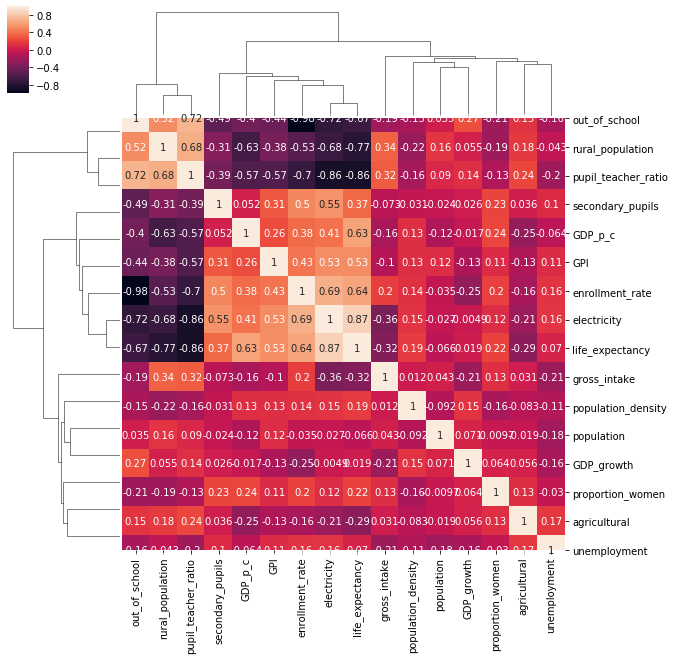

In [43]:
clustermap(corOfData,annot=True)

In [44]:
data=data.drop(columns=["out_of_school","electricity","agricultural","GDP_growth","secondary_pupils","population","proportion_women","rural_population","pupil_teacher_ratio","population_density"])


In [45]:
corOfData=data.corr()
corOfData

,GDP_p_c,life_expectancy,enrollment_rate,gross_intake,GPI,unemployment
GDP_p_c,1.000000,0.631966,0.383217,-0.161076,0.259309,-0.063915
life_expectancy,0.631966,1.000000,0.641236,-0.321068,0.534794,0.069815
enrollment_rate,0.383217,0.641236,1.000000,0.198245,0.426263,0.155605
gross_intake,-0.161076,-0.321068,0.198245,1.000000,-0.102763,-0.208786
GPI,0.259309,0.534794,0.426263,-0.102763,1.000000,0.110219
unemployment,-0.063915,0.069815,0.155605,-0.208786,0.110219,1.000000


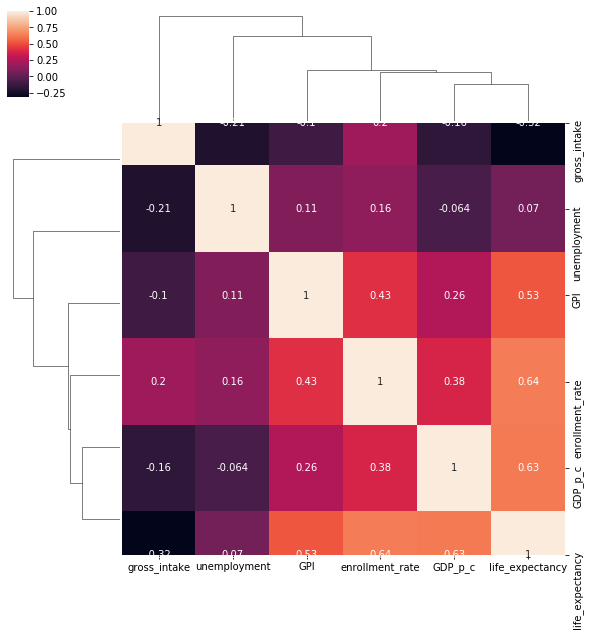

In [46]:
clustermap(corOfData,annot=True)

In [49]:
data.to_csv(index=True)
f= open("data.txt","w+")
f.write(data.to_csv(index=True))

9298